# WS 09 Tune AdaBoostRegressor

* es wurde festgestellt, dass z.B. AdaBoostRegressor unter Standard-Parametrisierung ein unbrauchbares Ergebnis liefert
* untersuchen Sie das Potential von Parameter-Tuning für diesen Regressor
* konzentrieren Sie sich auf folgende Parameter
  * learning_rate, Parameter von AdaBoostRegressor
  * max_depth, interner Parameter des Basis-Estimators, hier DecisionTreeRegressor
* falls Zeit übrig, untersuchen Sie noch andere Regressoren Ihrer Wahl dahingehend

In [3]:
## prepare env, read and prepare data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#codepath = '../2_code' ## for import of user defined module
#datapath = '../3_data'
codepath = '.././2_code' ## for import of user defined module
datapath = '../../3_data'

from sys import path; path.insert(1, codepath)
from os import chdir; chdir(datapath)

from bfh_cas_pml import prep_data
X_train, X_test, y_train, y_test = prep_data('melb_data_prep.csv', target='Price', seed=1234)

from bfh_cas_pml import test_regression_model

In [4]:
## baseline
from sklearn.ensemble import AdaBoostRegressor
this_model = test_regression_model(
    AdaBoostRegressor(random_state=1234), 
    X_train, y_train, X_test, y_test,
    show_plot=False)

R2 = -0.3023


0.05 0.5221143978043213
0.060000000000000005 0.5240912532917807
0.07 0.5255798946120415
0.08000000000000002 0.5204059905040977
0.09000000000000001 0.522828809581406
0.1 0.5141772439961587
0.11000000000000001 0.5146383601832738
0.12000000000000001 0.5140298684772102
0.13 0.5113124946735497
0.14 0.5030628610086694


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


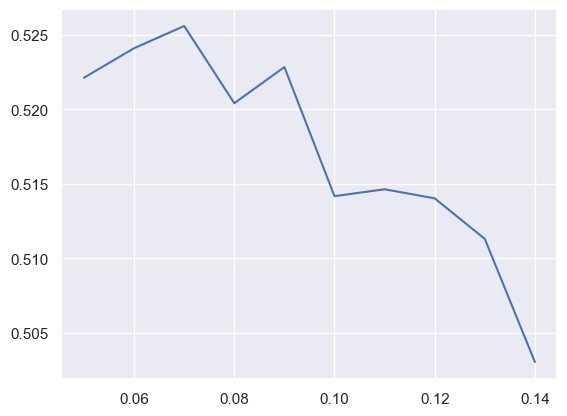

In [5]:
## tune learning_rate
model = AdaBoostRegressor()
#params = np.arange(0.1, 1, 0.1) ## vorlage
params = np.arange(0.05, 0.15, 0.01) ## loesung
scores = []

for param in params:
    model.set_params(learning_rate=param, random_state=1234)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)
    print(param, score)

sns.lineplot(x=params, y=scores);

10 0.7557299631257758
11 0.758500977810915
12 0.7626992985412937
13 0.7674329084019647
14 0.7671307844633629
15 0.7689296285653345
16 0.7655448595315713
17 0.7634543831075334
18 0.7565334380954082
19 0.7633021297334406


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


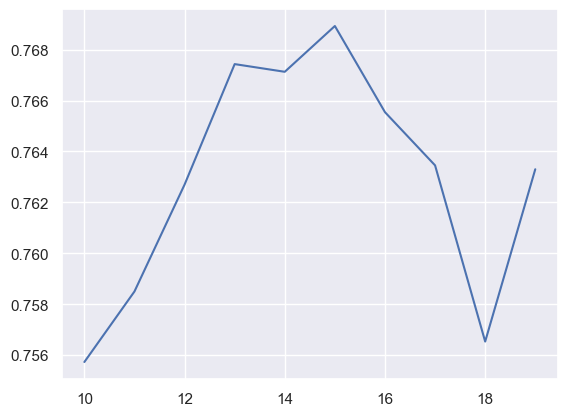

In [6]:
## tune max_depth
from sklearn.tree import DecisionTreeRegressor
model = AdaBoostRegressor()
#params = range(1, 11) ## vorlage
params = range(10, 20) ## loesung
scores = []

for param in params:
    model.set_params(
        estimator=DecisionTreeRegressor(max_depth=param),
        random_state=1234
    )
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)
    print(param, score)

sns.lineplot(x=params, y=scores);

In [7]:
## best combination of single parameters
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=15),
    learning_rate=0.07,
    random_state=1234
)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7633058383893074


**Fazit**:
* ideal wäre eine kombinierte Suche (Ausblick auf GridSearch und RandomSearch)

In [9]:
help(AdaBoostRegressor)

Help on class AdaBoostRegressor in module sklearn.ensemble._weight_boosting:

class AdaBoostRegressor(sklearn.utils._metadata_requests._RoutingNotSupportedMixin, sklearn.base.RegressorMixin, BaseWeightBoosting)
 |  AdaBoostRegressor(estimator=None, *, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
 |  
 |  An AdaBoost regressor.
 |  
 |  An AdaBoost [1] regressor is a meta-estimator that begins by fitting a
 |  regressor on the original dataset and then fits additional copies of the
 |  regressor on the same dataset but where the weights of instances are
 |  adjusted according to the error of the current prediction. As such,
 |  subsequent regressors focus more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost.R2 [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  estimator : object, default=None
 |      The base estimator from which the boosted ensemb